In [257]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [258]:
factors=pd.read_csv("factors.csv")

In [259]:
returns=pd.read_csv("returns_8.csv")

In [184]:
combined=factors.merge(returns)

In [185]:
combined

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,IntMom_01,IntMom_02,IntMom_03,IntMom_04,IntMom_05,IntMom_06,IntMom_07,IntMom_08,IntMom_09,IntMom_10
0,199001,-7.85,-1.31,0.85,-1.17,1.35,0.57,-1.365152,-4.362190,-0.721379,-6.325426,-5.583326,-7.136756,-7.309728,-8.097236,-9.285199,-13.121355
1,199002,1.11,1.17,0.64,-0.03,-0.66,0.57,4.449781,3.741826,3.429381,1.746593,0.982492,1.152197,1.252377,0.957659,1.749563,4.826167
2,199003,1.83,1.62,-2.92,2.04,-1.02,0.64,2.846218,2.039761,3.322193,2.164587,1.446742,1.145412,2.252182,2.495515,3.971113,4.153076
3,199004,-3.36,-0.33,-2.59,1.78,-0.98,0.69,-7.405680,-5.455301,-4.138029,-1.410098,-4.576751,-3.215523,-3.749317,-2.711928,-2.024952,-0.798161
4,199005,8.42,-2.35,-3.83,1.57,-1.68,0.68,4.047648,4.474529,8.699535,8.107325,7.347819,7.575799,8.600898,9.999686,10.354542,13.279710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,202108,2.91,-0.67,-0.16,-0.30,-1.76,0.00,5.718954,-0.448233,2.999977,1.627937,3.885119,2.942159,4.297470,1.287458,2.058386,2.255471
380,202109,-4.37,1.14,5.08,-1.90,2.14,0.00,-3.862641,-4.833552,-3.821461,-5.166485,-5.362004,-1.724156,-5.401501,-2.749050,-3.286938,-0.643447
381,202110,6.65,-2.70,-0.48,1.68,-1.44,0.00,3.138732,7.750708,7.168847,4.983029,7.229328,12.437463,5.270997,5.638759,5.162061,2.606859
382,202111,-1.55,-1.76,-0.44,7.22,1.74,0.00,-6.005078,2.644463,-1.842152,-3.460075,-3.843861,-4.376231,-3.532777,-2.485075,-3.398999,-1.120843


In [186]:
first_half=combined.iloc[:180]

In [187]:
second_half=combined.iloc[180:]

In [188]:
first_capm = pd.DataFrame()
second_capm = pd.DataFrame()
first_multifactor = pd.DataFrame()
second_multifactor = pd.DataFrame()
statistical_significance_CAPM = {"first": None, "second": None}
statistical_significance_MultiFactor = {"first": None, "second": None}

In [189]:
def CAPMRegression(half, num_tickers):
    if num_tickers > 10:
        print("Please enter a number from 1 to 10 for tickers")
        return
    if half == "first":
        time = first_half
        print("First Half: CAPM Regression\n")
    elif half == "second":
        time = second_half
        print("Second Half: CAPM Regression\n")
    else:
        print(f'Please input half as "first" or "second"')
        return
        
    alpha_array, beta_array, t_alpha_array, t_beta_array, p_value_array = [], [], [], [], []
    
    significance = 0
    
    for i in range(1, num_tickers + 1):
        ticker = f"IntMom_{i:02}"
        excess_returns = time[ticker] - time['RF']
        market_premium = sm.add_constant(time['Mkt-RF'])

        model = sm.OLS(excess_returns, market_premium).fit()

        alpha, beta = model.params
        t_alpha, t_beta = model.tvalues

        p_values = model.pvalues.iloc[0]

        if p_values < 0.05:
            significance += 1

        alpha_array.append(alpha)
        beta_array.append(beta)
        t_alpha_array.append(t_alpha)
        t_beta_array.append(t_beta)
        p_value_array.append(p_values)

        print(f"Alpha for {ticker} is: {alpha}, Beta for {ticker} is: {beta}, P-value for {ticker} is {p_values}.")
            
    statistical_significance_CAPM[half] = float(significance / num_tickers)

    if half == "first":
        first_capm['Alpha'] = alpha_array
        first_capm['Beta'] = beta_array
        first_capm['T_Alpha'] = t_alpha_array
        first_capm['T_Beta'] = t_beta_array
        first_capm['P_Value'] = p_value_array
    if half == "second":
        second_capm['Alpha'] = alpha_array
        second_capm['Beta'] = beta_array
        second_capm['T_Alpha'] = t_alpha_array
        second_capm['T_Beta'] = t_beta_array
        second_capm['P_Value'] = p_value_array

In [190]:
def MultiFactorRegression(half, num_tickers):
    if num_tickers > 10:
        print("Please enter a number from 1 to 10 for tickers")
        return
    if half == "first":
        time = first_half
        multifactor = first_multifactor
        print("First Half: Multi-Factor Regression\n")
    elif half == "second":
        time = second_half
        multifactor = second_multifactor
        print("Second Half: Multi-Factor Regression\n")
    else:
        print(f'Please input half as "first" or "second"')
        return
    significance = 0

    alpha_array, beta1_array, beta2_array, beta3_array, beta4_array, beta5_array, t_alpha_array = [], [], [], [], [], [] ,[]
    t_beta1_array, t_beta2_array, t_beta3_array, t_beta4_array, t_beta5_array, p_value_array = [], [], [], [], [], []
    
    for i in range(1, num_tickers + 1):
        ticker = f"IntMom_{i:02}"
        excess_returns = time[ticker] - time['RF']
        independent_vars = sm.add_constant(time[['Mkt-RF', 'HML', 'SMB', 'RMW', 'CMA']])
        
        model = sm.OLS(excess_returns, independent_vars).fit()
        
        alpha = model.params.iloc[0]
        betas = model.params.iloc[1:]

        t_alpha, t_beta1, t_beta2, t_beta3, t_beta4, t_beta5 = model.tvalues
        
        p_value = model.pvalues.iloc[0]

        if p_value < 0.05:
            significance += 1
        
        alpha_array.append(alpha)
        
        beta1_array.append(betas.iloc[0])
        beta2_array.append(betas.iloc[1])
        beta3_array.append(betas.iloc[2])
        beta4_array.append(betas.iloc[3])
        beta5_array.append(betas.iloc[4])

        t_alpha_array.append(t_alpha)
        t_beta1_array.append(t_beta1)
        t_beta2_array.append(t_beta2)
        t_beta3_array.append(t_beta3)
        t_beta4_array.append(t_beta4)
        t_beta5_array.append(t_beta5)

        p_value_array.append(p_value)
 
        print(f"Alpha for {ticker} is: {alpha}.")
        for j, beta in enumerate(betas, start=1):
            print(f"Beta {j} is: {beta}.")
        print(f"P-value is: {p_value}\n")
        
    statistical_significance_MultiFactor[half] = float(significance / num_tickers)

    if half == "first":
        first_multifactor['Alpha'] = alpha_array
        first_multifactor['Beta1'] = beta1_array
        first_multifactor['Beta2'] = beta2_array
        first_multifactor['Beta3'] = beta3_array
        first_multifactor['Beta4'] = beta4_array
        first_multifactor['Beta5'] = beta5_array
        first_multifactor['T_Alpha'] = t_alpha_array
        first_multifactor['T_Beta1'] = t_beta1_array
        first_multifactor['T_Beta2'] = t_beta2_array
        first_multifactor['T_Beta3'] = t_beta3_array
        first_multifactor['T_Beta4'] = t_beta4_array
        first_multifactor['T_Beta5'] = t_beta5_array
        first_multifactor['P_Value'] = p_value_array
    if half == "second":
        second_multifactor['Alpha'] = alpha_array
        second_multifactor['Beta1'] = beta1_array
        second_multifactor['Beta2'] = beta2_array
        second_multifactor['Beta3'] = beta3_array
        second_multifactor['Beta4'] = beta4_array
        second_multifactor['Beta5'] = beta5_array
        second_multifactor['T_Alpha'] = t_alpha_array
        second_multifactor['T_Beta1'] = t_beta1_array
        second_multifactor['T_Beta2'] = t_beta2_array
        second_multifactor['T_Beta3'] = t_beta3_array
        second_multifactor['T_Beta4'] = t_beta4_array
        second_multifactor['T_Beta5'] = t_beta5_array
        second_multifactor['P_Value'] = p_value_array

# Regression Analysis

In [191]:
CAPMRegression("first", 10)

First Half: CAPM Regression

Alpha for IntMom_01 is: -0.8091933855421238, Beta for IntMom_01 is: 1.5090600596581882, P-value for IntMom_01 is 0.08730324598088161.
Alpha for IntMom_02 is: -0.340704408541087, Beta for IntMom_02 is: 1.1567989136887742, P-value for IntMom_02 is 0.274234502907365.
Alpha for IntMom_03 is: -0.24689510634610484, Beta for IntMom_03 is: 0.9871231174531123, P-value for IntMom_03 is 0.2999701414230717.
Alpha for IntMom_04 is: -0.39865604391737774, Beta for IntMom_04 is: 0.9572587801626609, P-value for IntMom_04 is 0.03313612814686138.
Alpha for IntMom_05 is: 0.0026179540782839406, Beta for IntMom_05 is: 0.8172731872805608, P-value for IntMom_05 is 0.9874179081986266.
Alpha for IntMom_06 is: -0.06075828350207685, Beta for IntMom_06 is: 0.828554018278285, P-value for IntMom_06 is 0.6792938972261446.
Alpha for IntMom_07 is: 0.12455709760438843, Beta for IntMom_07 is: 0.8520375492963562, P-value for IntMom_07 is 0.3853861909611225.
Alpha for IntMom_08 is: 0.1081256944

In [192]:
CAPMRegression("second", 10)

Second Half: CAPM Regression

Alpha for IntMom_01 is: -1.2249227531365627, Beta for IntMom_01 is: 1.657126715027962, P-value for IntMom_01 is 0.0002638883681027542.
Alpha for IntMom_02 is: -0.26323817484567824, Beta for IntMom_02 is: 1.282546503460247, P-value for IntMom_02 is 0.2751274701879558.
Alpha for IntMom_03 is: -0.14939104603897047, Beta for IntMom_03 is: 1.249321730915843, P-value for IntMom_03 is 0.44198041762285134.
Alpha for IntMom_04 is: -0.043725883256669484, Beta for IntMom_04 is: 1.0796137987082046, P-value for IntMom_04 is 0.7434353488200502.
Alpha for IntMom_05 is: -0.11640361691854005, Beta for IntMom_05 is: 1.1014460747732584, P-value for IntMom_05 is 0.31081813208781867.
Alpha for IntMom_06 is: 0.019996195171652367, Beta for IntMom_06 is: 1.0353738847806089, P-value for IntMom_06 is 0.8232474410079004.
Alpha for IntMom_07 is: 0.01948687289446594, Beta for IntMom_07 is: 0.9306222440154989, P-value for IntMom_07 is 0.8038425983651357.
Alpha for IntMom_08 is: 0.01692

In [193]:
MultiFactorRegression("first", 10)

First Half: Multi-Factor Regression

Alpha for IntMom_01 is: -0.5828632766293723.
Beta 1 is: 1.2603032803410361.
Beta 2 is: 0.4738370121905269.
Beta 3 is: 0.6998848519975845.
Beta 4 is: -0.5766859149852095.
Beta 5 is: -0.5129610116378444.
P-value is: 0.18050046471723807

Alpha for IntMom_02 is: -0.44842821674366923.
Beta 1 is: 1.1498020683976526.
Beta 2 is: 0.481309766003302.
Beta 3 is: 0.3620190618672876.
Beta 4 is: -0.06199182098278728.
Beta 5 is: -0.3877630999493219.
P-value is: 0.1595067071522748

Alpha for IntMom_03 is: -0.5383259776686495.
Beta 1 is: 1.105064850829883.
Beta 2 is: 0.37207283656308004.
Beta 3 is: 0.21507971995207598.
Beta 4 is: 0.21769039546424676.
Beta 5 is: -0.20560027467441455.
P-value is: 0.024923261998408705

Alpha for IntMom_04 is: -0.570305464094584.
Beta 1 is: 1.043143357687421.
Beta 2 is: 0.4336007512221328.
Beta 3 is: 0.04594007157546253.
Beta 4 is: 0.06365696910476756.
Beta 5 is: -0.2568388939362313.
P-value is: 0.0018816753471595524

Alpha for IntMom_05

In [194]:
MultiFactorRegression("second", 10)

Second Half: Multi-Factor Regression

Alpha for IntMom_01 is: -0.8642195809129395.
Beta 1 is: 1.432424328754406.
Beta 2 is: 0.27047986736335583.
Beta 3 is: 0.6000377233380179.
Beta 4 is: -0.45481582677499344.
Beta 5 is: 0.05521407791867172.
P-value is: 0.005218114130215246

Alpha for IntMom_02 is: -0.10064404237035919.
Beta 1 is: 1.162150487627101.
Beta 2 is: 0.23029411476334272.
Beta 3 is: 0.31517144548706455.
Beta 4 is: -0.10534994789980373.
Beta 5 is: 0.04365017631070145.
P-value is: 0.669502393790717

Alpha for IntMom_03 is: 0.03105292086940906.
Beta 1 is: 1.129830290502353.
Beta 2 is: 0.4452789609618374.
Beta 3 is: 0.16785622536574213.
Beta 4 is: -0.018960374169828625.
Beta 5 is: -0.14276392949772682.
P-value is: 0.8604606861027211

Alpha for IntMom_04 is: 0.05051457800340226.
Beta 1 is: 1.0317145055003292.
Beta 2 is: 0.28145913278088946.
Beta 3 is: 0.004200267344144949.
Beta 4 is: -0.012851196847495416.
Beta 5 is: 0.0029375150996410124.
P-value is: 0.6884620672063915

Alpha for I

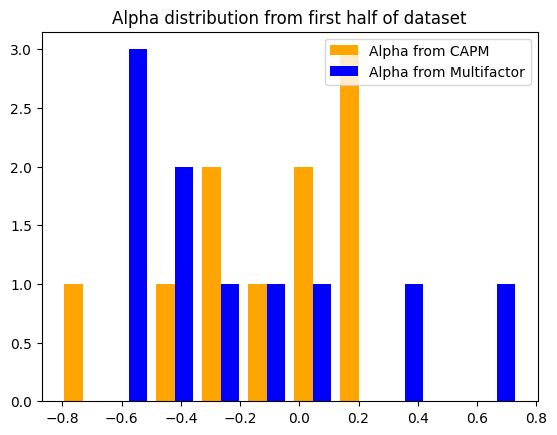

In [195]:
plt.hist([first_capm["Alpha"], first_multifactor["Alpha"]], color=['orange', 'blue'], bins=10,label=['Alpha from CAPM', 'Alpha from Multifactor'])
plt.legend()
plt.title("Alpha distribution from first half of dataset")
plt.show()

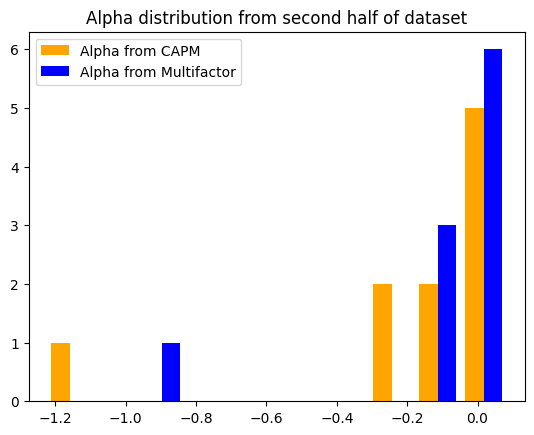

In [196]:
plt.hist([second_capm["Alpha"], second_multifactor["Alpha"]], color=['orange', 'blue'], bins=10, label=['Alpha from CAPM', 'Alpha from Multifactor'])
plt.legend()
plt.title("Alpha distribution from second half of dataset")
plt.show()

# Statistical Analysis

In [197]:
from scipy import stats
import seaborn as sns
%matplotlib inline

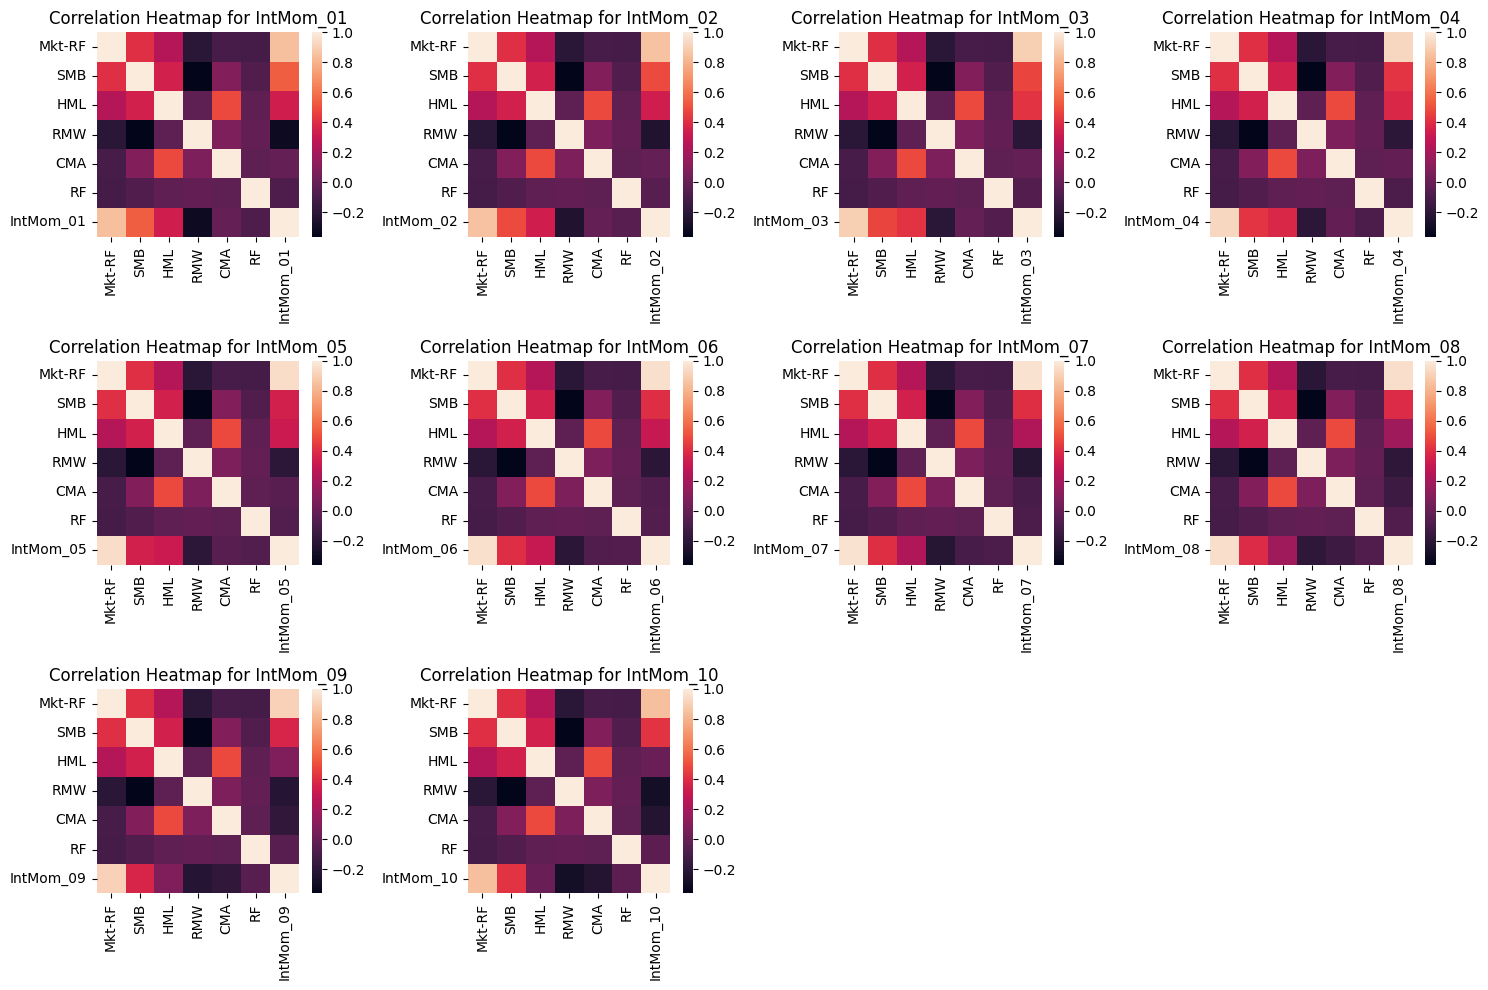

In [198]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, ticker in enumerate(range(1, 13), start=1):
    row_idx = (i - 1) // 4
    col_idx = (i - 1) % 4
    if i > 10:
        axes[row_idx, col_idx].set_visible(False)
        continue
    ticker_str = f"IntMom_{ticker:02}"
    corr_matrix = second_half[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', ticker_str]].corr()
    sns.heatmap(corr_matrix, ax=axes[row_idx, col_idx], annot=False, fmt='.2f', cbar=True)
    axes[row_idx, col_idx].set_title(f'Correlation Heatmap for {ticker_str}')
    
plt.tight_layout()
plt.show()

<Axes: >

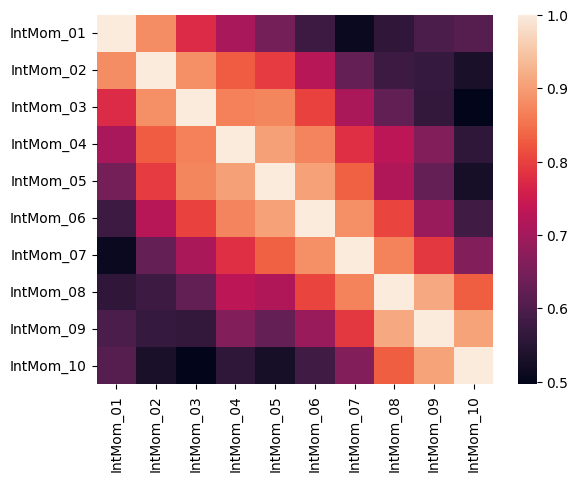

In [199]:
sns.heatmap(first_half[['IntMom_01', 'IntMom_02', 'IntMom_03', 'IntMom_04', 'IntMom_05', 'IntMom_06', 'IntMom_07', 'IntMom_08', 'IntMom_09', 'IntMom_10']].corr())

In [200]:
print(f"The percentage of statistically significant alphas from the first CAPM model is {statistical_significance_CAPM['first']*100}%.")

The percentage of statistically significant alphas from the first CAPM model is 10.0%.


In [201]:
print(f"The percentage of statistically significant alphas from the second CAPM model is {statistical_significance_CAPM['second']*100}%.")

The percentage of statistically significant alphas from the second CAPM model is 10.0%.


In [202]:
print(f"The percentage of statistically significant alphas from the first MultiFactor model is {statistical_significance_MultiFactor['first']*100}%.")

The percentage of statistically significant alphas from the first MultiFactor model is 60.0%.


In [203]:
print(f"The percentage of statistically significant alphas from the second MultiFactor model is {statistical_significance_MultiFactor['second']*100}%.")

The percentage of statistically significant alphas from the second MultiFactor model is 10.0%.


# Long-Short Portfolio Analysis

In [204]:
def LongShortPortfolio(highest_alpha_index, lowest_alpha_index, half):
    if half == "first":
        time_period = first_half
        print("First Half: CAPM Regression\n")
    elif half == "second":
        time_period = second_half
        print("Second Half: CAPM Regression\n")
    else:
        print('Please input half as "first" or "second"')
        return
    
    if highest_alpha_index > 9:
        long_position = time_period[f"IntMom_{highest_alpha_index}"]
    else:
        long_position = time_period[f"IntMom_0{highest_alpha_index}"]
        
    if lowest_alpha_index > 9:
        short_position = time_period[f"IntMom_{lowest_alpha_index}"]
    else:
        short_position = time_period[f"IntMom_0{lowest_alpha_index}"]
        
    portfolio = long_position - short_position
    
    excess_returns = portfolio - time_period['RF']
    market_premium = sm.add_constant(time_period['Mkt-RF'])

    model = sm.OLS(excess_returns, market_premium).fit()

    alpha, beta = model.params

    p_values = model.pvalues.iloc[0]
    
    print(f"The statistics for the long-short portfolio with a long position on Int Mom {highest_alpha_index} and short position on Int Mom {lowest_alpha_index} are:\n")
    print(f"Alpha: {alpha}\nBeta: {beta}\n")
    if p_values < 0.05:
        print(f"P-value: {p_values}\nThe alpha is statistically significant.")
    else:
        print(f"P-value: {p_values}\nThe alpha is not statistically significant.")

In [205]:
# First half
first_half_highestcapm = (pd.DataFrame(first_capm['Alpha']).idxmax()).iloc[0] + 1 
first_half_lowestcapm = (pd.DataFrame(first_capm['Alpha']).idxmin()).iloc[0] + 1

In [206]:
second_half_highestcapm = (pd.DataFrame(second_capm['Alpha']).idxmax()).iloc[0] + 1 
second_half_lowestcapm = (pd.DataFrame(second_capm['Alpha']).idxmin()).iloc[0] + 1

In [207]:
LongShortPortfolio(first_half_highestcapm, first_half_lowestcapm, "first")

First Half: CAPM Regression

The statistics for the long-short portfolio with a long position on Int Mom 10 and short position on Int Mom 1 are:

Alpha: 0.6532945873144074
Beta: -0.007155982603522005

P-value: 0.25556363299163615
The alpha is not statistically significant.


In [208]:
LongShortPortfolio(second_half_highestcapm, second_half_lowestcapm, "second")

Second Half: CAPM Regression

The statistics for the long-short portfolio with a long position on Int Mom 9 and short position on Int Mom 1 are:

Alpha: 1.2090865592567162
Beta: -0.655541220988229

P-value: 0.0032614433174837833
The alpha is statistically significant.


# T-Stats Correlation

In [220]:
CAPM_Alpha_Correlation = np.corrcoef(first_capm["T_Alpha"], second_capm["T_Alpha"])[0,1]
CAPM_Beta_Correlation = np.corrcoef(first_capm["T_Beta"], second_capm["T_Beta"])[0,1]

print("T-Stats Correlation for CAPM Model Pre-2005 and Post-2005:\n")
print(f"Alpha correlation: {CAPM_Alpha_Correlation.round(2)*100}%")
print(f"Beta correlation: {CAPM_Beta_Correlation.round(2)*100}%")

T-Stats Correlation for CAPM Model Pre-2005 and Post-2005:

Alpha correlation: 59.0%
Beta correlation: 77.0%


In [224]:
MultiFactor_Alpha_Correlation = np.corrcoef(first_multifactor["T_Alpha"], second_multifactor["T_Alpha"])[0,1]
MultiFactor_Beta1_Correlation = np.corrcoef(first_multifactor["T_Beta1"], second_multifactor["T_Beta1"])[0,1]
MultiFactor_Beta2_Correlation = np.corrcoef(first_multifactor["T_Beta2"], second_multifactor["T_Beta2"])[0,1]
MultiFactor_Beta3_Correlation = np.corrcoef(first_multifactor["T_Beta3"], second_multifactor["T_Beta3"])[0,1]
MultiFactor_Beta4_Correlation = np.corrcoef(first_multifactor["T_Beta4"], second_multifactor["T_Beta4"])[0,1]
MultiFactor_Beta5_Correlation = np.corrcoef(first_multifactor["T_Beta5"], second_multifactor["T_Beta5"])[0,1]

print("T-Stats Correlation for Multi-Factor Model Pre-2005 and Post-2005:\n")
print(f"Alpha correlation: {MultiFactor_Alpha_Correlation.round(2)*100}%")
print(f"Mkt-RF Beta correlation: {MultiFactor_Beta1_Correlation.round(2)*100}%")
print(f"HML Beta correlation: {MultiFactor_Beta2_Correlation.round(2)*100}%")
print(f"SMB Beta correlation: {MultiFactor_Beta3_Correlation.round(2)*100}%")
print(f"RMW Beta correlation: {MultiFactor_Beta4_Correlation.round(2)*100}%")
print(f"CMA Beta correlation: {MultiFactor_Beta5_Correlation.round(2)*100}%")

T-Stats Correlation for Multi-Factor Model Pre-2005 and Post-2005:

Alpha correlation: -13.0%
Mkt-RF Beta correlation: 99.0%
HML Beta correlation: 96.0%
SMB Beta correlation: 70.0%
RMW Beta correlation: 53.0%
CMA Beta correlation: -26.0%


In [260]:
returns.columns

Index(['Date', 'IntMom_01', 'IntMom_02', 'IntMom_03', 'IntMom_04', 'IntMom_05',
       'IntMom_06', 'IntMom_07', 'IntMom_08', 'IntMom_09', 'IntMom_10'],
      dtype='object')

In [273]:
for i in range(1, len(returns.columns)):
    ticker = returns.columns[i]
    
    first_half_returns = sum(first_half[ticker])
    second_half_returns = sum(second_half[ticker])
    print(f"The returns for {ticker} before 2005 were {first_half_returns}%")
    print(f"The returns for {ticker} after 2005 were {second_half_returns}%")
    if first_half_returns > 0 and second_half_returns > 0:
        print(f"{ticker} was profitable both before and after 2005.\n")
    elif first_half_returns > 0 and second_half_returns < 0:
        print(f"{ticker} was profitable before 2005 but not after.\n")
    elif first_half_returns < 0 and second_half_returns > 0:
        print(f"{ticker} was profitable after 2005 but not before.\n")
    else:
        print(f"{ticker} was not profitable before or after 2005.\n")

The returns for IntMom_01 before 2005 were 85.04609509189028%
The returns for IntMom_01 after 2005 were 60.25264164174516%
IntMom_01 was profitable both before and after 2005.

The returns for IntMom_02 before 2005 were 129.87506865452653%
The returns for IntMom_02 after 2005 were 190.7424181083397%
IntMom_02 was profitable both before and after 2005.

The returns for IntMom_03 before 2005 were 127.73499601771853%
The returns for IntMom_03 after 2005 were 208.14027177607053%
IntMom_03 was profitable both before and after 2005.

The returns for IntMom_04 before 2005 were 97.06933911451115%
The returns for IntMom_04 after 2005 were 199.93258783308428%
IntMom_04 was profitable both before and after 2005.

The returns for IntMom_05 before 2005 were 153.60207422386026%
The returns for IntMom_05 after 2005 were 188.93527474235182%
IntMom_05 was profitable both before and after 2005.

The returns for IntMom_06 before 2005 were 143.45927103917023%
The returns for IntMom_06 after 2005 were 205.

In [285]:
Long_Position_First_Portfolio = returns.columns[first_half_highestcapm]
Short_Position_First_Portfolio = returns.columns[first_half_lowestcapm]
first_half_returns = sum(first_half[Long_Position_First_Portfolio] - first_half[Short_Position_First_Portfolio])
second_half_returns = sum(second_half[Long_Position_First_Portfolio] - second_half[Short_Position_First_Portfolio])
print(f"The returns for the first long-short portfolio before 2005 were {first_half_returns}%")
print(f"The returns for the first long-short portfolio after 2005 were {second_half_returns}%")
if first_half_returns > 0 and second_half_returns > 0:
    print(f"The long-short portfolio was profitable both before and after 2005.\n")
elif first_half_returns > 0 and second_half_returns < 0:
    print(f"The long-short portfolio was profitable before 2005 but not after.\n")
elif first_half_returns < 0 and second_half_returns > 0:
    print(f"The long-short portfolio was profitable after 2005 but not before.\n")
else:
    print(f"The long-short portfolio was not profitable before or after 2005.\n")

The returns for the first long-short portfolio before 2005 were 178.28062538726041%
The returns for the first long-short portfolio after 2005 were 138.18629511440463%
The long-short portfolio was profitable both before and after 2005.



In [287]:
Long_Position_Second_Portfolio = returns.columns[second_half_highestcapm]
Short_Position_Second_Portfolio = returns.columns[second_half_lowestcapm]
first_half_returns = sum(first_half[Long_Position_Second_Portfolio] - first_half[Short_Position_Second_Portfolio])
second_half_returns = sum(second_half[Long_Position_Second_Portfolio] - second_half[Short_Position_Second_Portfolio])
print(f"The returns for the second long-short portfolio before 2005 were {first_half_returns}%")
print(f"The returns for the second long-short portfolio after 2005 were {second_half_returns}%")
if first_half_returns > 0 and second_half_returns > 0:
    print(f"The long-short portfolio was profitable both before and after 2005.\n")
elif first_half_returns > 0 and second_half_returns < 0:
    print(f"The long-short portfolio was profitable before 2005 but not after.\n")
elif first_half_returns < 0 and second_half_returns > 0:
    print(f"The long-short portfolio was profitable after 2005 but not before.\n")
else:
    print(f"The long-short portfolio was not profitable before or after 2005.\n")

The returns for the second long-short portfolio before 2005 were 132.38090679979473%
The returns for the second long-short portfolio after 2005 were 151.19483875145443%
The long-short portfolio was profitable both before and after 2005.



# Mean Variance Frontier

In [363]:
from scipy.optimize import minimize

In [364]:
for i in range(1, len(returns.columns)):
    ticker = returns.columns[i]
    first_half_returns = pd.DataFrame(first_half[ticker])
    first_half_excess_returns = sum(first_half[ticker] - first_half['RF'])

In [365]:
mu = first_half_returns.mean()
S = first_half_returns.cov()

In [366]:
def objective(weights):
    portfolio_return = np.dot(weights, mu)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(S, weights)))
    sharpe_ratio = first_half_excess_returns / portfolio_volatility
    return -sharpe_ratio

In [367]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(mu)))
initial_weights = np.array(len(mu) * [1. / len(mu)])
opt_results = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = opt_results.x

In [368]:
expected_return = np.dot(optimized_weights, mu)
portfolio_variance = np.dot(optimized_weights.T, np.dot(S, optimized_weights))
sharpe_ratio = expected_return / np.sqrt(portfolio_variance)

In [369]:
print(f"Expected Excess Return: {expected_return*100}%")
print(f"Portfolio Variance: {portfolio_variance}")
print(f"Sharpe Ratio: {sharpe_ratio}")

Expected Excess Return: 146.29262248841707%
Portfolio Variance: 62.9725626018358
Sharpe Ratio: 0.18435152811102257


# Post-2005 Performance

In [370]:
for i in range(1, len(returns.columns)):
    ticker = returns.columns[i]
    second_half_returns = pd.DataFrame(second_half[ticker])
    second_half_excess_returns = sum(second_half[ticker] - second_half['RF'])

In [371]:
mu = second_half_returns.mean()
portfolio_return = np.dot(initial_weights, mu)
weighted_returns = second_half_returns.dot(optimized_weights)
actual_return = weighted_returns.mean()
portfolio_variance = np.dot(optimized_weights.T, np.dot(second_half_returns.cov(), optimized_weights))
portfolio_std_dev = np.sqrt(portfolio_variance)
sharpe_ratio = second_half_excess_returns / portfolio_std_dev

In [372]:
print(f"Actual Return (Post-2005): {actual_return*100}%")
print(f"Portfolio Variance (Post-2005): {portfolio_variance}")
print(f"Sharpe Ratio (Post-2005): {sharpe_ratio}")

Actual Return (Post-2005): 97.27398860595582%
Portfolio Variance (Post-2005): 40.38538076882199
Sharpe Ratio (Post-2005): 28.155840109456726
